# Part 1
### 1. Exploratory Data Analysis (EDA)
I will explore the distribution of attrition across key demographic and job-related variables (age, gender, education, job role, department) and analyze how employee satisfaction and work-life balance impact attrition. This will include visualizing relationships through histograms, bar plots, and box plots.

### 2. Data Preprocessing
I will clean the data by handling missing values, encoding categorical variables (e.g., JobRole, MaritalStatus), and normalizing or standardizing numerical features (e.g., MonthlyIncome, Age) to ensure the data is suitable for analysis.

### 3. Correlation and Trend Analysis
I will calculate correlation coefficients to identify relationships between numerical variables (e.g., Age, MonthlyIncome) and attrition rates. Additionally, I will analyze performance trends across job roles and departments and visualize these relationships with cross-tabulations and heatmaps.

In [91]:
#Tracking Employee Attrition:
#Library Import:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
#Data import:

df = pd.read_csv('/Users/teitelbaumsair/Desktop/Hackathon_2/Hackathon_2/WA_Fn-UseC_-HR-Employee-Attrition.csv')

df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [93]:
#Get data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [94]:
#No null values in Dataset
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [95]:
#View general df statistics
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [96]:
#Look at all columns and values to determine:
#a) How many employees left vs stayed?
#c) How many employees travel?
#d) How many employees departments ther are, and how many employees per department?
#e) What are the Education Fields and how many employees per field?
#f) How many employees are men and how many are women?
#g) What employee job roles are and how many per role?
#h) What is the count of employee MaritalStatus?
#f) How many employees do

for column in df.columns:
    if df[column].dtype == 'object':
        print(f"{column}: {df[column].unique()}")
        print(df[column].value_counts())
        print("________________________________")


Attrition: ['Yes' 'No']
Attrition
No     1233
Yes     237
Name: count, dtype: int64
________________________________
BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
________________________________
Department: ['Sales' 'Research & Development' 'Human Resources']
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
________________________________
EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
________________________________
Gender: ['Female' 'Male']
Gender
Male      882
Female    588
Name: count, dtype: int64
________________________________

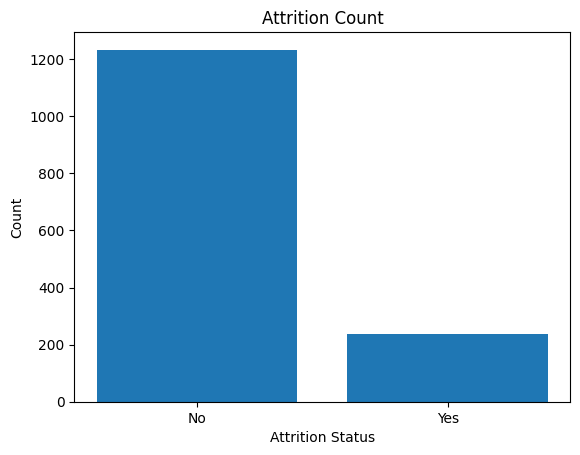

In [97]:
import matplotlib.pyplot as plt

attrition_counts = df['Attrition'].value_counts()

plt.bar(attrition_counts.index, attrition_counts.values)
plt.title('Attrition Count')
plt.xlabel('Attrition Status')
plt.ylabel('Count')
plt.show()



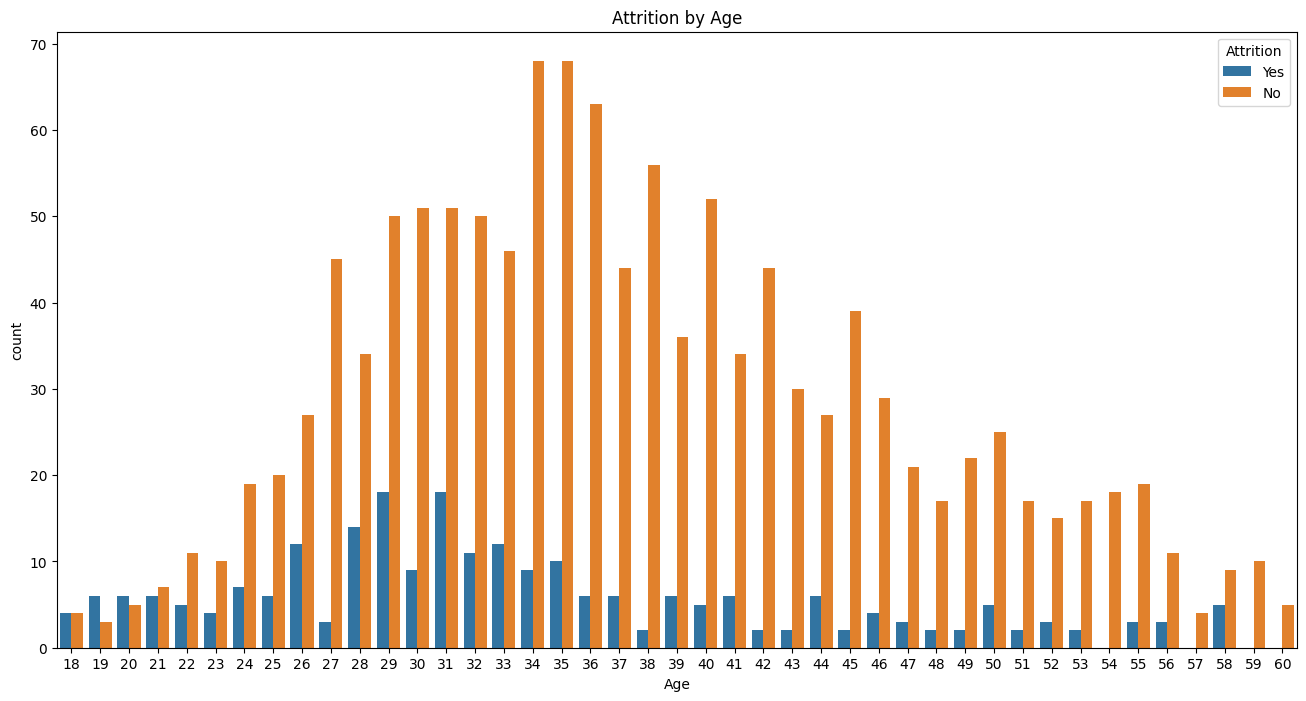

In [98]:
plt.figure(figsize=(16, 8))
sns.countplot(x='Age', hue='Attrition', data=df)
plt.title('Attrition by Age')
plt.show()


In [99]:
#Removal of columns
df = df.drop('Over18', axis= 1)
df = df.drop('EmployeeNumber', axis= 1)
df = df.drop('EmployeeCount', axis= 1)
df = df.drop('StandardHours', axis= 1)

# Categorical Columns to be preprocessed:


In [100]:
# Binary processing: Attrition, Gender, OverTime

import pandas as pd
import pandas as pd
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x=='Yes' else 0)
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['OverTime'] = df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)


In [101]:
# OneHot Encoding: BusinessTravel, Department, EducationField, JobRole, MaritalStatus
df = df.join(pd.get_dummies(df['BusinessTravel'])).drop('BusinessTravel', axis=1)
df = df.join(pd.get_dummies(df['Department'], prefix= 'Departmnet')).drop('Department', axis=1)
df = df.join(pd.get_dummies(df['EducationField'], prefix= 'EducationField')).drop('EducationField', axis=1)
df = df.join(pd.get_dummies(df['JobRole'], prefix= 'JobRole')).drop('JobRole', axis=1)
df = df.join(pd.get_dummies(df['MaritalStatus'], prefix= 'MaritalStatus')).drop('MaritalStatus', axis=1)

In [102]:
# Normalize/standardize numerical features (DailyRate, DistanceFromHome, HourlyRate, MonthlyRate,).
from scipy.stats import zscore

df['DistanceFromHome_normalized'] = 1 + ((df['DistanceFromHome'] - df['DistanceFromHome'].min()) / (df['DistanceFromHome'].max() - df['DistanceFromHome'].min()) * 9)
df['DistanceFromHome_normalized'] = df['DistanceFromHome'].round(2)
df[['DailyRate_normalized', 'HourlyRate_normalized', 'MonthlyRate_normalized']] = df[['DailyRate', 'HourlyRate', 'MonthlyRate']].apply(zscore)
df['YearsAtCompany_normalized'] = np.sqrt(df['YearsAtCompany'])
df['YearsInCurrentRole_normalized'] = np.sqrt(df['YearsInCurrentRole'])
df['YearsSinceLastPromotion_normalized'] = np.sqrt(df['YearsSinceLastPromotion'])
df['YearsWithCurrManager_normalized'] = np.sqrt(df['YearsWithCurrManager'])
df['TotalWorkingYears_normalized'] = np.sqrt(df['TotalWorkingYears'])
df['PercentSalaryHike_normalized'] = np.sqrt(df['PercentSalaryHike'])
df['MonthlyIncome_normalized'] = np.sqrt(df['MonthlyIncome'])


In [103]:
df = df.map(lambda x: 1 if x is True else 0 if x is False else x)
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,DailyRate_normalized,HourlyRate_normalized,MonthlyRate_normalized,YearsAtCompany_normalized,YearsInCurrentRole_normalized,YearsSinceLastPromotion_normalized,YearsWithCurrManager_normalized,TotalWorkingYears_normalized,PercentSalaryHike_normalized,MonthlyIncome_normalized
0,41,1,1102,1,2,2,0,94,3,2,...,0.742527,1.383138,0.726020,2.449490,2.000000,0.000000,2.236068,2.828427,3.316625,77.414469
1,49,0,279,8,1,3,1,61,2,2,...,-1.297775,-0.240677,1.488876,3.162278,2.645751,1.000000,2.645751,3.162278,4.795832,71.624018
2,37,1,1373,2,2,4,1,92,2,1,...,1.414363,1.284725,-1.674841,0.000000,0.000000,0.000000,0.000000,2.645751,3.872983,45.716518
3,33,0,1392,3,4,4,0,56,3,1,...,1.461466,-0.486709,1.243211,2.828427,2.645751,1.732051,0.000000,2.828427,3.316625,53.935146
4,27,0,591,2,1,1,1,40,3,1,...,-0.524295,-1.274014,0.325900,1.414214,1.414214,1.414214,1.414214,2.449490,3.464102,58.889727


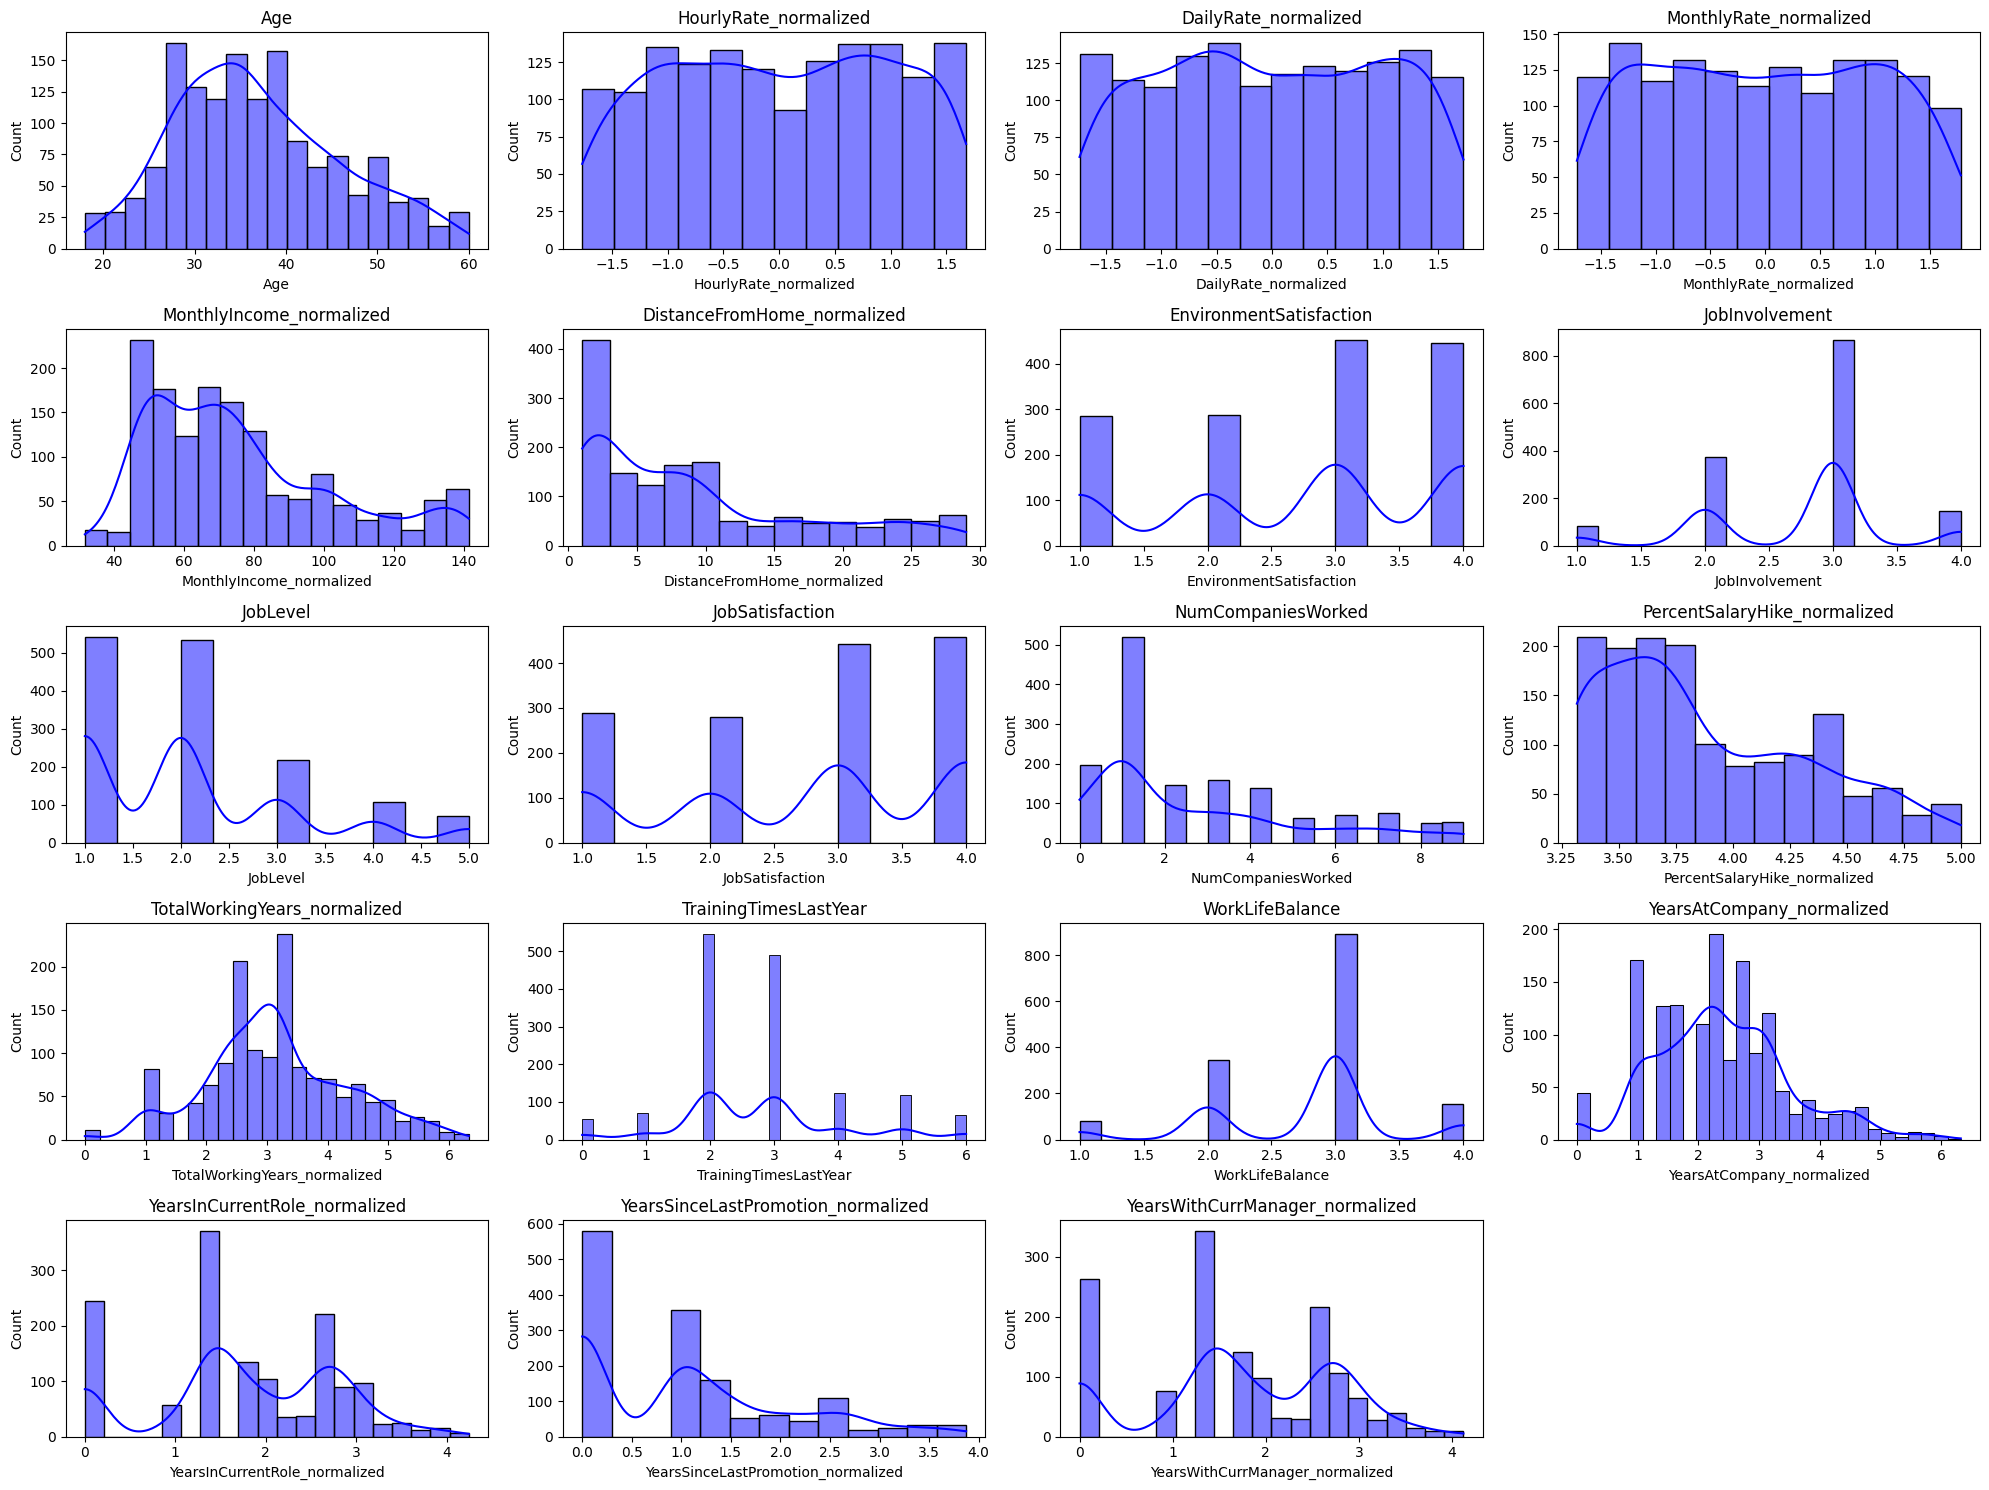

In [107]:
columns_to_plot = [
    'Age', 'HourlyRate_normalized', 'DailyRate_normalized', 'MonthlyRate_normalized', 'MonthlyIncome_normalized',
    'DistanceFromHome_normalized', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
    'NumCompaniesWorked', 'PercentSalaryHike_normalized', 'TotalWorkingYears_normalized', 'TrainingTimesLastYear',
    'WorkLifeBalance', 'YearsAtCompany_normalized', 'YearsInCurrentRole_normalized', 'YearsSinceLastPromotion_normalized',
    'YearsWithCurrManager_normalized'
]
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 15)) 
axes = axes.flatten()

for i, column in enumerate(columns_to_plot):
    sns.histplot(df[column], kde=True, ax=axes[i], color='blue', edgecolor='black')
    axes[i].set_title(column)

for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [108]:
df.to_csv('cleaned_and_normalized_data.csv', index=False)
